<a href="https://www.kaggle.com/code/kusumakar/iphone-reviews-nlp-using-nltk-accuracy-85?scriptVersionId=198916869" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iphone-customer-reviews-nlp/iphone.csv


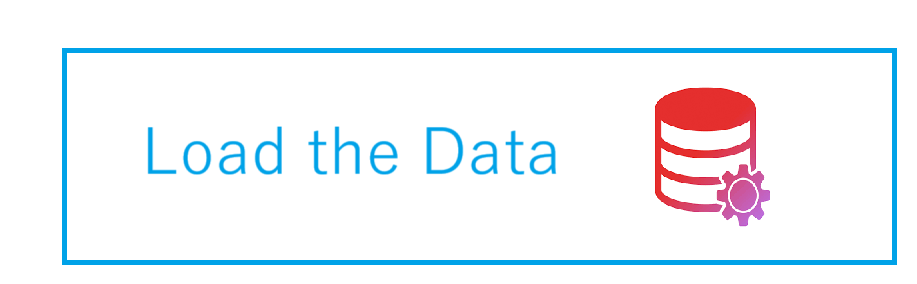

In [2]:

df=pd.read_csv("/kaggle/input/iphone-customer-reviews-nlp/iphone.csv")

In [3]:
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


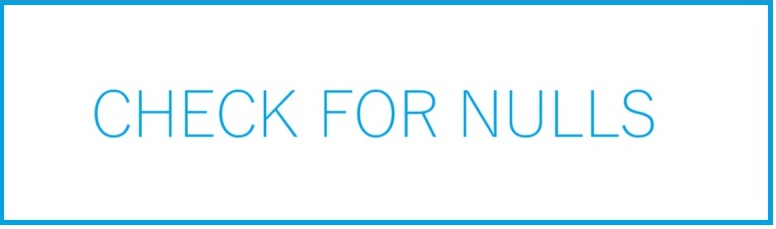

In [4]:
df.isnull().sum()

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

In [5]:
df.shape

(3062, 11)

In [6]:
df2=df.dropna()

In [7]:
df2.isnull().sum()

productAsin          0
country              0
date                 0
isVerified           0
ratingScore          0
reviewTitle          0
reviewDescription    0
reviewUrl            0
reviewedIn           0
variant              0
variantAsin          0
dtype: int64

In [8]:
df2.shape

(2960, 11)

## We will just take the review, and predict the rating from the review

In [9]:
df3=df2[['reviewDescription','ratingScore']]

In [10]:
df3['ratingScore']=df3['ratingScore'].apply(lambda x:'Bad' if x<=3 else 'Good')

/tmp/ipykernel_17/2749365809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ratingScore']=df3['ratingScore'].apply(lambda x:'Bad' if x<=3 else 'Good')


## We will encoede the Rating into Good and Bad. Rating <=3 is BAD and Rating greater than 3 is GOOD

In [11]:
df4=pd.concat([df3,pd.get_dummies(df3['ratingScore'],drop_first=True)],axis=1)

In [12]:
df4

,reviewDescription,ratingScore,Good
0,"Every thing is good about iPhones, there's not...",Good,True
1,"It look so fabulous, I am android user switche...",Good,True
2,I tried to flip camera while recording but no ...,Good,True
3,100% genuine,Good,True
4,Happy to get the iPhone 13 in Amazon offer,Good,True
...,...,...,...
3057,Useless phon never buy this heat n useless cam...,Bad,False
3058,iam not happy with this product why because ch...,Bad,False
3059,Good phone,Bad,False
3060,While charging mobile it's getting so hot even...,Bad,False


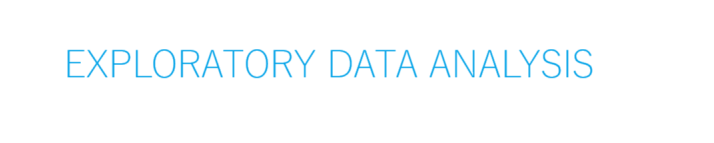

In [13]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
corpus = []
from gensim.utils import simple_preprocess

In [15]:
reviews = df4['reviewDescription'].tolist()

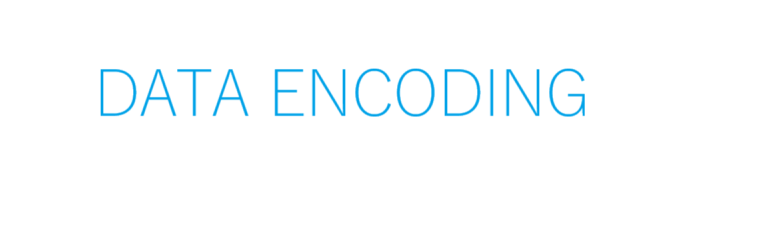

In [16]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
 
stem = SnowballStemmer('english')
corpus=[]
for text in reviews:
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [stem.stem(word) for word in filtered_tokens]


  
    cleaned_text = ' '.join(lemmatized_tokens)
    corpus.append(cleaned_text)



In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)

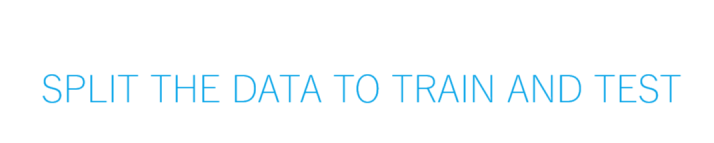

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(corpus,df4['Good'],test_size=0.2)

In [19]:
X_train_transformed = cv.fit_transform(X_train)
X_test_transformed = cv.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed,Y_train)

RandomForestClassifier()

In [21]:
ypred=rf.predict(X_test_transformed)

In [22]:
from sklearn.metrics import classification_report,accuracy_score
accuracy_score(ypred,Y_test)

0.8462837837837838

In [23]:
print(classification_report(ypred,Y_test))

              precision    recall  f1-score   support

       False       0.72      0.81      0.76       179
        True       0.91      0.86      0.89       413

    accuracy                           0.85       592
   macro avg       0.82      0.84      0.82       592
weighted avg       0.85      0.85      0.85       592



## OVERALL ACCURACY IS 85.47% . This can further be improved by hyperparameter tuning. 